In [1]:
import sys, os 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

sys.path.append("/lustre/storeB/users/martinls/src/opendrift")

In [2]:
import matplotlib
import cartopy

In [3]:
%matplotlib inline

In [4]:
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_netCDF_CF_generic

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

np.random.seed(983214)

In [5]:
#o = OceanDrift(loglevel=20) # Lower log level will crash the notebook for anything but very small simulations
o = OceanDrift(loglevel=50)

In [6]:
print(OceanDrift.required_variables)
print(OceanDrift.fallback_values)

# vertical profiles
print(OceanDrift.required_profiles)
print(OceanDrift.required_profiles_z_range)

['x_sea_water_velocity', 'y_sea_water_velocity', 'x_wind', 'y_wind', 'land_binary_mask']
{'x_sea_water_velocity': 0, 'y_sea_water_velocity': 0, 'x_wind': 0, 'y_wind': 0}
None
None


In [7]:
model_input_file = '/lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'

reader_norkyst = reader_netCDF_CF_generic.Reader(model_input_file)
print(reader_norkyst)

Reader: /lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc
Projection: 
  +proj=stere +ellps=WGS84 +lat_0=90.0 +lat_ts=60.0 +x_0=3192800 +y_0=1784000 +lon_0=70
Coverage: [m]
  xmin: 0.000000   xmax: 2080800.000000   step: 800   numx: 2602
  ymin: 0.000000   ymax: 720800.000000   step: 800   numy: 902
  Corners (lon, lat):
    ( -1.58,  58.50)  ( 23.71,  75.32)
    (  9.19,  55.91)  ( 38.06,  70.03)
Vertical levels [m]: 
  [-0.0 -3.0 -10.0 -15.0 -25.0 -50.0 -75.0 -100.0 -150.0 -200.0 -250.0
 -300.0 -500.0 -1000.0 -2000.0 -3000.0]
Available time range:
  start: 2019-07-16 00:00:00   end: 2019-07-16 23:00:00   step: 1:00:00
    24 times (0 missing)
Variables:
  salinity_vertical_diffusion_coefficient
  x_wind
  y_wind
  forecast_reference_time
  sea_floor_depth_below_sea_level
  latitude
  longitude
  sea_water_salinity
  sea_water_temperature
  time
  x_sea_water_velocity
  eastward_sea_water_velocity
  y_sea_water_velocity


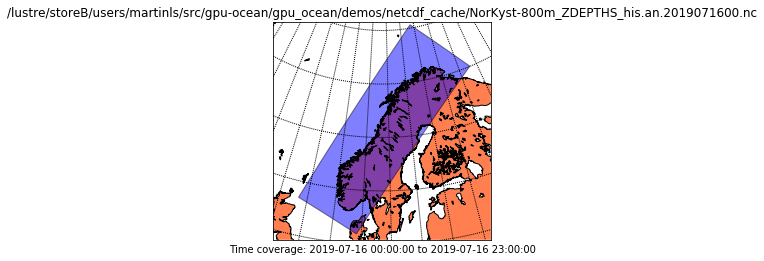

In [8]:
reader_norkyst.plot()

AttributeError: 'NameError' object has no attribute 'message'

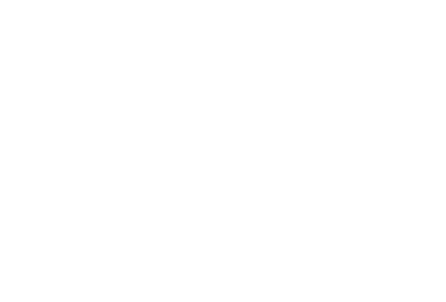

In [9]:
from opendrift.readers import reader_basemap_landmask

#reader_basemap = reader_basemap_landmask.Reader(
#                       llcrnrlon=-1.58228, llcrnrlat=55.9084,
#                       urcrnrlon=38.064, urcrnrlat=75.3155,
#                       resolution='h', projection='merc')

lons = reader_norkyst.lon
lats = reader_norkyst.lat

reader_basemap = reader_basemap_landmask.Reader(
            llcrnrlon=lons.min(),
            llcrnrlat=lats.min(),
            urcrnrlon=lons.max(),
            urcrnrlat=lats.max(),
            resolution="h",
            projection="merc")


In [10]:
#o.add_reader([reader_basemap, reader_norkyst])
o.add_reader([reader_norkyst])

In [11]:
print(o)

Model:	OceanDrift     (OpenDrift version 1.1.0rc2)
	0 active PassiveTracer particles  (0 deactivated, 0 scheduled)
Projection: +proj=stere +ellps=WGS84 +lat_0=90.0 +lat_ts=60.0 +x_0=3192800 +y_0=1784000 +lon_0=70
-------------------
Environment variables:
  -----
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind
     1) /lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc
  -----
Readers not added for the following variables:
  land_binary_mask



In [12]:
o.seed_elements(lon=4.3, lat=60, number=10, radius=1000,
                    time=reader_norkyst.start_time)

In [13]:
# TODO: Check: No wind drift factor for OceanDrift

#print(o.list_configspec())

# This should work according to OpenDrift docs. Have commented out line self.advect_wind() from oceandrift.py to remove wind drag, as a workaround
#o.set_config('wind_drift_factor', 0.0)

#wind_drift_factor = o.get_config('drift:wind_drift_factor')

In [14]:
o.run(end_time=reader_norkyst.end_time, time_step=900,
          time_step_output=3600, outfile='opendrift.nc')#,
          #export_variables=['density', 'water_content'])

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f83772330f0>,
 <module 'matplotlib.pyplot' from '/home/martinls/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

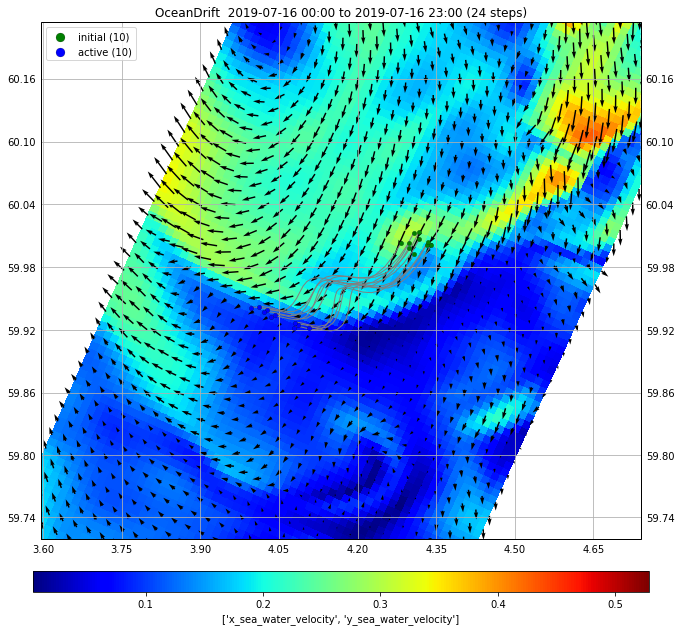

In [23]:
o.plot(background=['x_sea_water_velocity', 'y_sea_water_velocity'])

In [17]:
print(o)

--------------------
Reader performance:
--------------------
/lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc
 0:00:01.9  total
 0:00:00.0  preparing
 0:00:01.8  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  interpolation_time
 0:00:00.0  masking
--------------------
Performance:
   57.1 total time
   50.2 configuration
    4.6 preparing main loop
      4.6 making dynamical landmask
      0.0 moving elements to ocean
      2.1 readers
        0.0 global_landmask
        0.0 postprocessing
    2.1 main loop
        2.0 /lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc
      0.0 updating elements
    0.0 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.1.0rc2)
	10 active PassiveTracer p

In [31]:
print(o.elements)

print(o.elements.lon)
print(o.elements.lat)



ID: [ 1  2  3  4  5  6  7  8  9 10]
status: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
age_seconds: [82800.0 82800.0 82800.0 82800.0 82800.0 82800.0 82800.0 82800.0 82800.0
 82800.0]
lon: [4.087141513824463 4.011135578155518 4.0417938232421875 4.107406139373779
 4.079936504364014 3.9958126544952393 4.026208400726318 4.035477638244629
 4.021231174468994 4.0791916847229]
lat: [59.92434310913086 59.942203521728516 59.93436050415039 59.92180633544922
 59.9262809753418 59.94145584106445 59.93949508666992 59.93257141113281
 59.93709182739258 59.92200469970703]
z: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
wind_drift_factor: [0.019999999552965164 0.019999999552965164 0.019999999552965164
 0.019999999552965164 0.019999999552965164 0.019999999552965164
 0.019999999552965164 0.019999999552965164 0.019999999552965164
 0.019999999552965164]

[4.087141513824463 4.011135578155518 4.0417938232421875 4.107406139373779
 4.079936504364014 3.9958126544952393 4.026208400726318 4.035477638244629
 4.021231174